In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
Aquifer_Luco = pd.read_csv('./datasets/Aquifer_Luco.csv')

In [3]:
Aquifer_Luco

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.90,6.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663


In [4]:
Aquifer_Luco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 7487 non-null   object 
 1   Rainfall_Simignano                   6822 non-null   float64
 2   Rainfall_Siena_Poggio_al_Vento       951 non-null    float64
 3   Rainfall_Mensano                     1722 non-null   float64
 4   Rainfall_Montalcinello               6525 non-null   float64
 5   Rainfall_Monticiano_la_Pineta        2205 non-null   float64
 6   Rainfall_Sovicille                   6657 non-null   float64
 7   Rainfall_Ponte_Orgia                 1260 non-null   float64
 8   Rainfall_Scorgiano                   3036 non-null   float64
 9   Rainfall_Pentolina                   2116 non-null   float64
 10  Rainfall_Monteroni_Arbia_Biena       3104 non-null   float64
 11  Depth_to_Groundwater_Podere_Ca

In [5]:
Aquifer_Luco.shape

(7487, 22)

### Filled Entries

<AxesSubplot:>

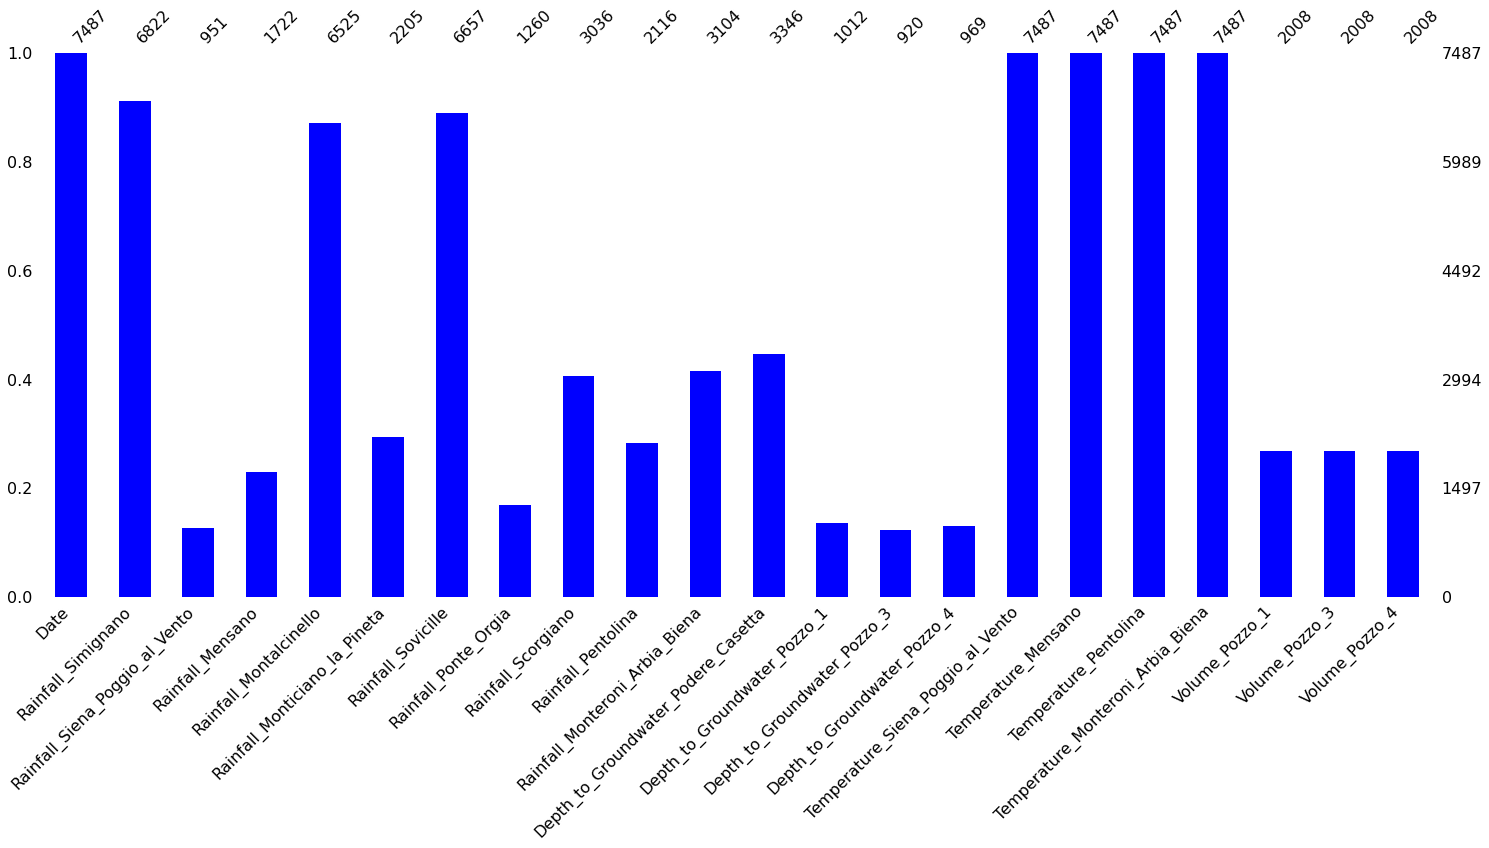

In [6]:
msno.bar(Aquifer_Luco,color='b')

### Dates starting and ending values

In [7]:
print('starting date:', Aquifer_Luco.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Luco.Date.values[[0,-1]][1])


starting date: 01/01/2000
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

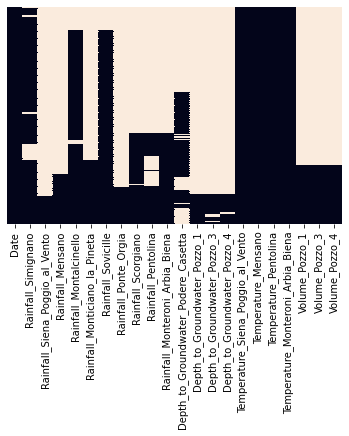

In [8]:
sns.heatmap(Aquifer_Luco.isnull(),yticklabels=False,cbar=False)

In [9]:
data=Aquifer_Luco.copy()
data.drop('Date',axis=1,inplace=True)

In [10]:
null_va = Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta']
null_va.isnull().sum()

4141

In [11]:
Aquifer_Luco.drop(Aquifer_Luco.index[0:2973], inplace=True)
Aquifer_Luco
null_va = Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta']
null_va.isnull().sum()

1168

<AxesSubplot:>

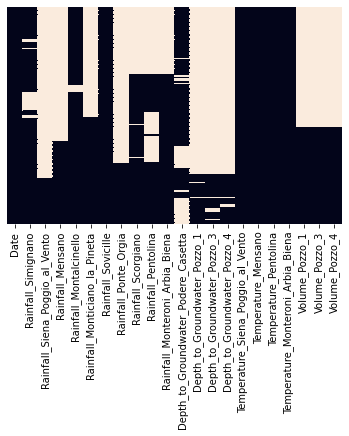

In [12]:
sns.heatmap(Aquifer_Luco.isnull(),yticklabels=False,cbar=False)

### Feature Selection

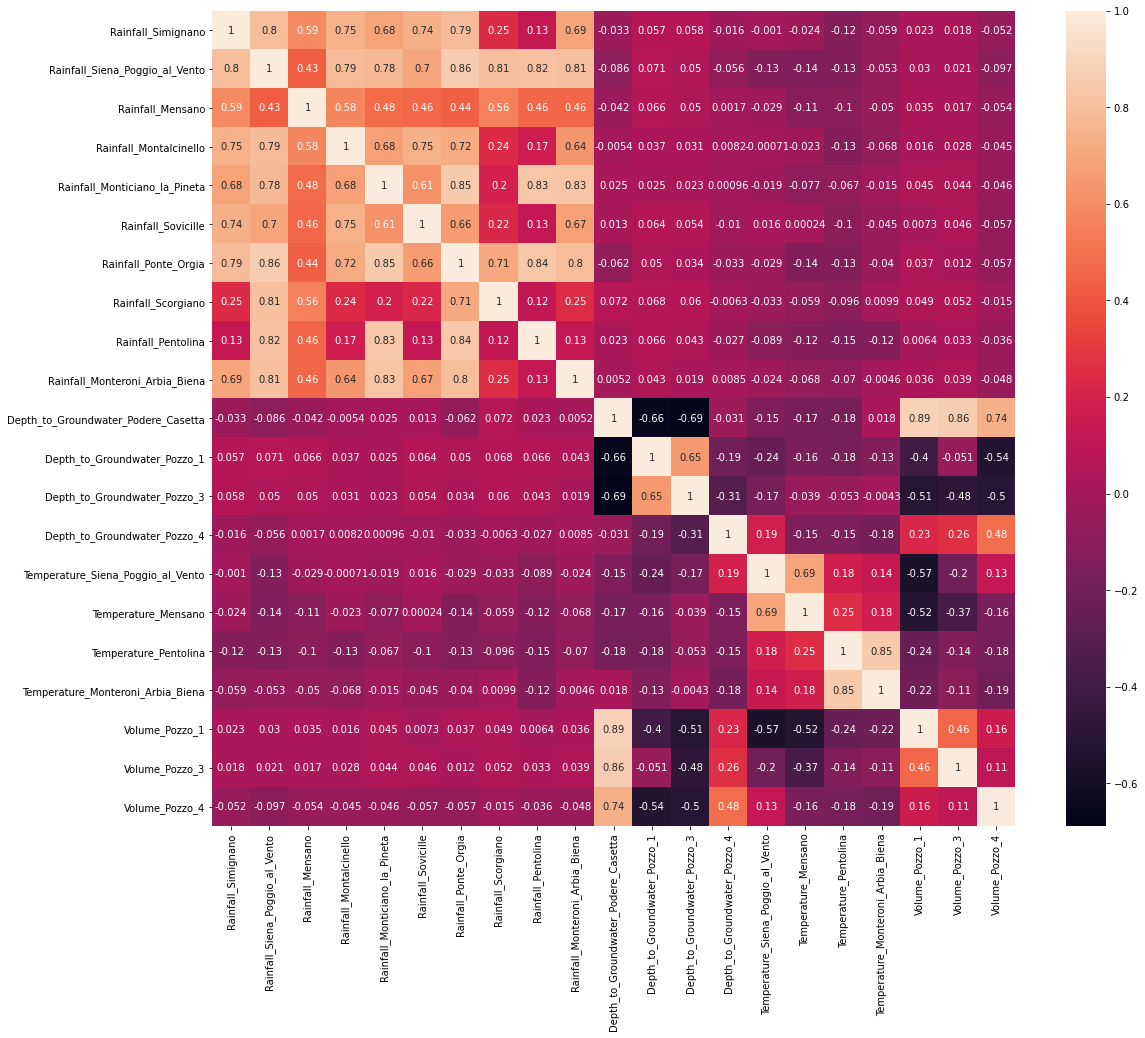

In [13]:
#sns.heatmap(data.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [14]:
features_nan=[features for features in Aquifer_Luco.columns if Aquifer_Luco[features].isnull().sum()>1 and Aquifer_Luco[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Luco[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Simignano 11.9628 % missing 
Rainfall_Siena_Poggio_al_Vento 78.9322 % missing 
Rainfall_Mensano 61.852 % missing 
Rainfall_Montalcinello 3.035 % missing 
Rainfall_Monticiano_la_Pineta 51.152 % missing 
Rainfall_Sovicille 0.1108 % missing 
Rainfall_Ponte_Orgia 72.0868 % missing 
Rainfall_Scorgiano 32.7426 % missing 
Rainfall_Pentolina 53.1236 % missing 
Rainfall_Monteroni_Arbia_Biena 31.2362 % missing 
Depth_to_Groundwater_Podere_Casetta 25.8751 % missing 
Depth_to_Groundwater_Pozzo_1 77.5809 % missing 
Depth_to_Groundwater_Pozzo_3 79.619 % missing 
Depth_to_Groundwater_Pozzo_4 78.5335 % missing 
Volume_Pozzo_1 55.5162 % missing 
Volume_Pozzo_3 55.5162 % missing 
Volume_Pozzo_4 55.5162 % missing 


In [15]:
'''
Columns that are going to be dropped

'Depth_to_Groundwater_Pozzo_1'
'Depth_to_Groundwater_Pozzo_3'
'Depth_to_Groundwater_Pozzo_4'

'Rainfall_Ponte_Orgia'
'Rainfall_Siena_Poggio_al_Vento'
'Rainfall_Mensano'

'''

"\nColumns that are going to be dropped\n\n'Depth_to_Groundwater_Pozzo_1'\n'Depth_to_Groundwater_Pozzo_3'\n'Depth_to_Groundwater_Pozzo_4'\n\n'Rainfall_Ponte_Orgia'\n'Rainfall_Siena_Poggio_al_Vento'\n'Rainfall_Mensano'\n\n"

In [16]:
Aquifer_Luco_corr = Aquifer_Luco.drop(['Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_3','Depth_to_Groundwater_Pozzo_4','Rainfall_Ponte_Orgia','Rainfall_Siena_Poggio_al_Vento','Rainfall_Mensano'],axis=1)

<AxesSubplot:>

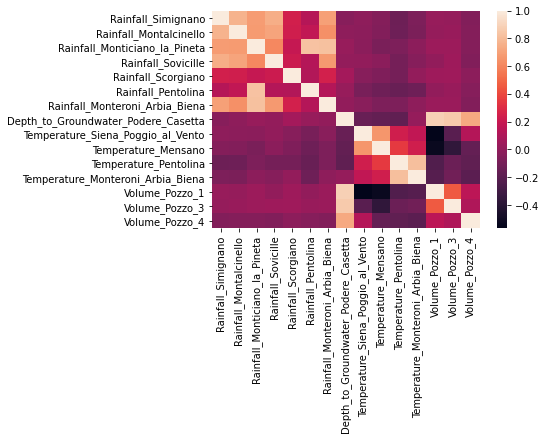

In [17]:
sns.heatmap(Aquifer_Luco_corr.corr())

In [18]:
a = Aquifer_Luco_corr

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Simignano 11.9628 % missing 
Rainfall_Montalcinello 3.035 % missing 
Rainfall_Monticiano_la_Pineta 51.152 % missing 
Rainfall_Sovicille 0.1108 % missing 
Rainfall_Scorgiano 32.7426 % missing 
Rainfall_Pentolina 53.1236 % missing 
Rainfall_Monteroni_Arbia_Biena 31.2362 % missing 
Depth_to_Groundwater_Podere_Casetta 25.8751 % missing 
Volume_Pozzo_1 55.5162 % missing 
Volume_Pozzo_3 55.5162 % missing 
Volume_Pozzo_4 55.5162 % missing 


### Imputation

Rainfall_Simignano


In [19]:
a['Rainfall_Simignano'].isnull().sum()
#excatly 540 values are missing out of 4514

540

In [20]:
a['Rainfall_Simignano'].describe()

count    3974.000000
mean        2.588626
std         7.166941
min         0.000000
25%         0.000000
50%         0.000000
75%         0.800000
max        87.800000
Name: Rainfall_Simignano, dtype: float64

In [21]:
a['Rainfall_Simignano'].value_counts().unique
# These are numarical values i.e., rainfall. so most of the values are zeros but we can see mode, median and mode


<bound method Series.unique of 0.0     2474
0.2      339
0.4       94
0.6       55
0.8       44
        ... 
50.6       1
40.2       1
43.0       1
51.2       1
22.2       1
Name: Rainfall_Simignano, Length: 192, dtype: int64>

In [22]:
mean_of_Rainfall_Simignano=a['Rainfall_Simignano'].mean()
print(mean_of_Rainfall_Simignano)

2.5886260694514336


In [23]:
median_of_Rainfall_Simignano=a['Rainfall_Simignano'].median()
print(median_of_Rainfall_Simignano)

0.0


In [24]:
mode_of_Rainfall_Simignano=a['Rainfall_Simignano'].mode()
print(mode_of_Rainfall_Simignano)


0    0.0
dtype: float64


#Hence by looking into the details mode or median is best suit for these missing values because the large numbers are zero values i.e., 2474

In [25]:
a['Rainfall_Simignano']=a['Rainfall_Simignano'].fillna(a['Rainfall_Simignano'].median())

In [26]:
a['Rainfall_Simignano'].isnull().sum()

0

#function for mean,median,mode

In [27]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

Rainfall_Montalcinello

In [28]:
x=a['Rainfall_Montalcinello']
cal(x)

null_values:  
  137 
  count_values:  
  <bound method Series.unique of 0.0      2576
0.2       457
0.4       145
0.6        62
0.8        46
         ... 
12.4        1
134.6       1
50.6        1
28.0        1
34.4        1
Name: Rainfall_Montalcinello, Length: 200, dtype: int64> 
  mean:  
  2.7054603609778436 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#only 137 null values 
#most of them or zeros around 2576
#mean is 2.7 and the median and mode is zero 
#conclution here we can go with median

In [29]:
a['Rainfall_Montalcinello']=a['Rainfall_Montalcinello'].fillna(a['Rainfall_Montalcinello'].median())

Rainfall_Monticiano_la_Pineta

In [30]:
y=a['Rainfall_Monticiano_la_Pineta']
cal(y)


null_values:  
  2309 
  count_values:  
  <bound method Series.unique of 0.0     1267
0.2      264
0.4       76
0.6       33
0.8       23
        ... 
36.6       1
52.6       1
14.2       1
34.0       1
54.0       1
Name: Rainfall_Monticiano_la_Pineta, Length: 168, dtype: int64> 
  mean:  
  3.10585034013604 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#2309 null values 
#most of them or zeros around 1267
#mean is 3.1 and the median and mode is zero 
#conclution here we can go with median because i dont want to give mean of 3.1 to 2309 that make nosense

In [31]:
a['Rainfall_Monticiano_la_Pineta']=a['Rainfall_Monticiano_la_Pineta'].fillna(a['Rainfall_Monticiano_la_Pineta'].median())

Rainfall_Sovicille

In [32]:
x=a['Rainfall_Sovicille']

In [33]:
cal(x)

null_values:  
  5 
  count_values:  
  <bound method Series.unique of 0.0     2766
0.2      443
0.4      109
0.6       71
1.0       43
        ... 
28.6       1
24.6       1
49.6       1
33.4       1
46.6       1
Name: Rainfall_Sovicille, Length: 195, dtype: int64> 
  mean:  
  2.4939010867154616 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#only 5 null values 
#most of them or zeros around 2766
#mean is 2.4 and the median and mode is zero 
#conclution here we can go with median

In [34]:
a['Rainfall_Sovicille']=a['Rainfall_Sovicille'].fillna(a['Rainfall_Sovicille'].median())

Rainfall_Scorgiano

In [35]:
x=a['Rainfall_Scorgiano']
cal(x)

null_values:  
  1478 
  count_values:  
  <bound method Series.unique of 0.0      1801
0.2       347
0.4        76
0.6        51
1.0        42
         ... 
47.4        1
15.0        1
459.6       1
52.8        1
33.6        1
Name: Rainfall_Scorgiano, Length: 174, dtype: int64> 
  mean:  
  3.222134387351791 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#1478 null values 
#most of them or zeros around 1801
#mean is 3.2 and the median and mode is zero 
#conclution here we can go with median because i dont want to give mean of 3.2 to 1478 that make nosense

In [36]:
a['Rainfall_Scorgiano']=a['Rainfall_Scorgiano'].fillna(a['Rainfall_Scorgiano'].median())

Rainfall_Pentolina

In [37]:
x=a['Rainfall_Pentolina']
cal(x)

null_values:  
  2398 
  count_values:  
  <bound method Series.unique of 0.0     1133
0.2      257
0.4      100
0.6       36
1.2       24
        ... 
49.8       1
60.2       1
22.0       1
41.2       1
56.0       1
Name: Rainfall_Pentolina, Length: 192, dtype: int64> 
  mean:  
  8.734782608695737 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#2398 null values 
#most of them or zeros around 1133
#mean is 8.73 and the median and mode is zero 
#conclution here we can go with median because i dont want to give mean of 8.73 to 2398 that make nosense

In [38]:
a['Rainfall_Pentolina']=a['Rainfall_Pentolina'].fillna(a['Rainfall_Pentolina'].median())

Rainfall_Monteroni_Arbia_Biena

In [39]:
x=a['Rainfall_Monteroni_Arbia_Biena']
cal(x)

null_values:  
  1410 
  count_values:  
  <bound method Series.unique of 0.0     1841
0.2      398
0.4       86
0.6       41
0.8       38
        ... 
47.8       1
29.0       1
86.0       1
42.0       1
39.8       1
Name: Rainfall_Monteroni_Arbia_Biena, Length: 164, dtype: int64> 
  mean:  
  2.391108247422662 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


#same as the above and replacing with median

In [40]:
a['Rainfall_Monteroni_Arbia_Biena']=a['Rainfall_Monteroni_Arbia_Biena'].fillna(a['Rainfall_Monteroni_Arbia_Biena'].median())

In [41]:
x=a['Depth_to_Groundwater_Podere_Casetta']
cal(x)

null_values:  
  1168 
  count_values:  
  <bound method Series.unique of -7.6    268
-7.7    172
-5.4    146
-7.9    140
-6.7    140
-6.4    138
-8.2    135
-7.5    117
-7.8    111
-6.3    109
-5.3    102
-6.6     96
-7.3     95
-7.4     95
-6.5     85
-8.0     79
-6.2     76
-8.3     75
-8.1     75
-4.9     68
-8.6     67
-5.0     64
-6.1     57
-7.1     57
-6.8     54
-9.5     53
-5.9     53
-5.5     51
-5.7     47
-8.7     45
-7.0     44
-6.0     40
-5.6     38
-7.2     35
-6.9     35
-5.8     33
-8.9     31
-5.2     29
-9.3     26
-9.6     26
-9.4     25
-5.1     25
-8.8     25
-9.2     18
-9.1     14
-8.4     13
-9.0     11
-8.5      7
-4.8      1
Name: Depth_to_Groundwater_Podere_Casetta, dtype: int64> 
  mean:  
  -7.0792289300657725 
  median:  
  -7.3 
  mode:  
  0   -7.6
dtype: float64


here we can take mean values

In [42]:
a['Depth_to_Groundwater_Podere_Casetta']=a['Depth_to_Groundwater_Podere_Casetta'].fillna(a['Depth_to_Groundwater_Podere_Casetta'].mean())


Volume_Pozzo_1 55.5162 % missing 
Volume_Pozzo_3 55.5162 % missing 
Volume_Pozzo_4 55.5162 % missing 

In [43]:
x=a['Volume_Pozzo_1']
cal(x)

null_values:  
  2506 
  count_values:  
  <bound method Series.unique of -139.926571    31
-156.211646    31
-119.901470    31
-194.328550    30
-125.506506    30
               ..
-155.367808     4
-205.196584     4
-239.193888     4
-132.200047     4
-110.572266     4
Name: Volume_Pozzo_1, Length: 126, dtype: int64> 
  mean:  
  -160.68437663964536 
  median:  
  -163.5450612 
  mode:  
  0   -156.211646
1   -139.926571
2   -119.901470
dtype: float64


In [44]:
x=a['Volume_Pozzo_3']
y=a['Volume_Pozzo_4']

In [45]:
cal(x)

null_values:  
  2506 
  count_values:  
  <bound method Series.unique of  0.000000      61
-135.119424    31
-145.889047    31
-149.725245    31
-55.637591     30
               ..
-153.594407     4
-76.108915      4
-130.060320     4
-217.083013     4
-72.642624      4
Name: Volume_Pozzo_3, Length: 123, dtype: int64> 
  mean:  
  -147.77313359782198 
  median:  
  -148.8741228 
  mode:  
  0    0.0
dtype: float64


In [46]:
cal(y)

null_values:  
  2506 
  count_values:  
  <bound method Series.unique of -62.040524     31
-27.942992     31
-36.966140     31
-51.544683     30
-49.136663     30
               ..
-130.784448     4
-156.679776     4
-148.549184     4
-188.555952     4
-104.142809     4
Name: Volume_Pozzo_4, Length: 126, dtype: int64> 
  mean:  
  -135.2146632948606 
  median:  
  -145.845891 
  mode:  
  0   -62.040524
1   -36.966140
2   -27.942992
dtype: float64


for all these we can place mean

In [47]:
a['Volume_Pozzo_1']=a['Volume_Pozzo_1'].fillna(a['Volume_Pozzo_1'].mean())
a['Volume_Pozzo_3']=a['Volume_Pozzo_3'].fillna(a['Volume_Pozzo_3'].mean())
a['Volume_Pozzo_4']=a['Volume_Pozzo_4'].fillna(a['Volume_Pozzo_4'].mean())

In [48]:
a.isnull().sum()

Date                                   0
Rainfall_Simignano                     0
Rainfall_Montalcinello                 0
Rainfall_Monticiano_la_Pineta          0
Rainfall_Sovicille                     0
Rainfall_Scorgiano                     0
Rainfall_Pentolina                     0
Rainfall_Monteroni_Arbia_Biena         0
Depth_to_Groundwater_Podere_Casetta    0
Temperature_Siena_Poggio_al_Vento      0
Temperature_Mensano                    0
Temperature_Pentolina                  0
Temperature_Monteroni_Arbia_Biena      0
Volume_Pozzo_1                         0
Volume_Pozzo_3                         0
Volume_Pozzo_4                         0
dtype: int64

In [49]:
pd.DataFrame.to_csv(a,'./new_datasets/Aquifer_Luco.csv')